In [2]:
# A Jupyter notebook for generating ploidy-seq violin plots which show
# Class I and Class II CV distributions within metabolic networks.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# This line makes matplotlib figures render in the notebook
%matplotlib inline

In [4]:
# Define colors and resolution for figures
bot_color = '#CB1E43'
top_color = '#1A668B'
tf_color = '#D8DB21'

reg_color = '#ff4293'
DPI = 600

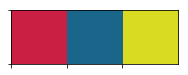

In [5]:
# Read in the data
drm = pd.read_excel('../data/DR_TF_Tasdighian.xlsx')

# Color palette stuff
class_colors = [bot_color, top_color, tf_color]
sns.set_palette(class_colors)
sns.palplot(sns.color_palette())

In [6]:
drm

,Orthogroup,Accession,Gene Count,Class,DR,SD,PRV
0,ORTHO010736,C24,2,Bot,0.502759,0.031190,0.062038
1,ORTHO000752,C24,12,Bot,0.801071,0.354954,0.443100
2,ORTHO000297,C24,9,Bot,0.973047,0.583076,0.599226
3,ORTHO000353_1,C24,8,Bot,1.113313,1.075448,0.965989
4,ORTHO000415,C24,8,Bot,5.949360,8.924113,1.500012
5,ORTHO000458,C24,7,Bot,1.012941,0.563495,0.556296
6,ORTHO000553,C24,7,Bot,0.768711,0.547669,0.712450
7,ORTHO000267,C24,6,Bot,2.919892,3.617838,1.239031
8,ORTHO000354,C24,6,Bot,1.414902,0.696807,0.492477
9,ORTHO000302_1,C24,5,Bot,0.578667,0.114784,0.198359


In [5]:
# Constants that are used for plotting significance bars
dev = .2
menMeans   = (1.4, 1.3, 3., 1.3, 1.3, 0.4)
ind = [0-dev, 0+dev, 1-dev, 1+dev, 2-dev, 2+dev]

def label_diff(ax, i,j,text,X,Y, y_shift=0, y_diff =.6):
    """Add and label a significance bar between contents i and j
    
    Inputs:
        i: index of left group
        j: index of right group
        text: string of text that will be printed above the significance bar
        X: array of x-values for different groups
        Y: array of arrays of values plotted in different groups
        y_shift: value by which to move the text for finer control of how the output looks
        
    This function was modified from one that I found online. I added y_shift since we are
    plotting over kernel density estimates, so the top of the KDE will not always nicely line
    up with the greatest data value.
    
    When using this fxn, iterate over different values of y_shift to make the figure look good.
    """
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j]) + y_shift
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':12,'shrinkB':12,'linewidth':1}
    ax.annotate(text, xy=(X[i],y+y_diff), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

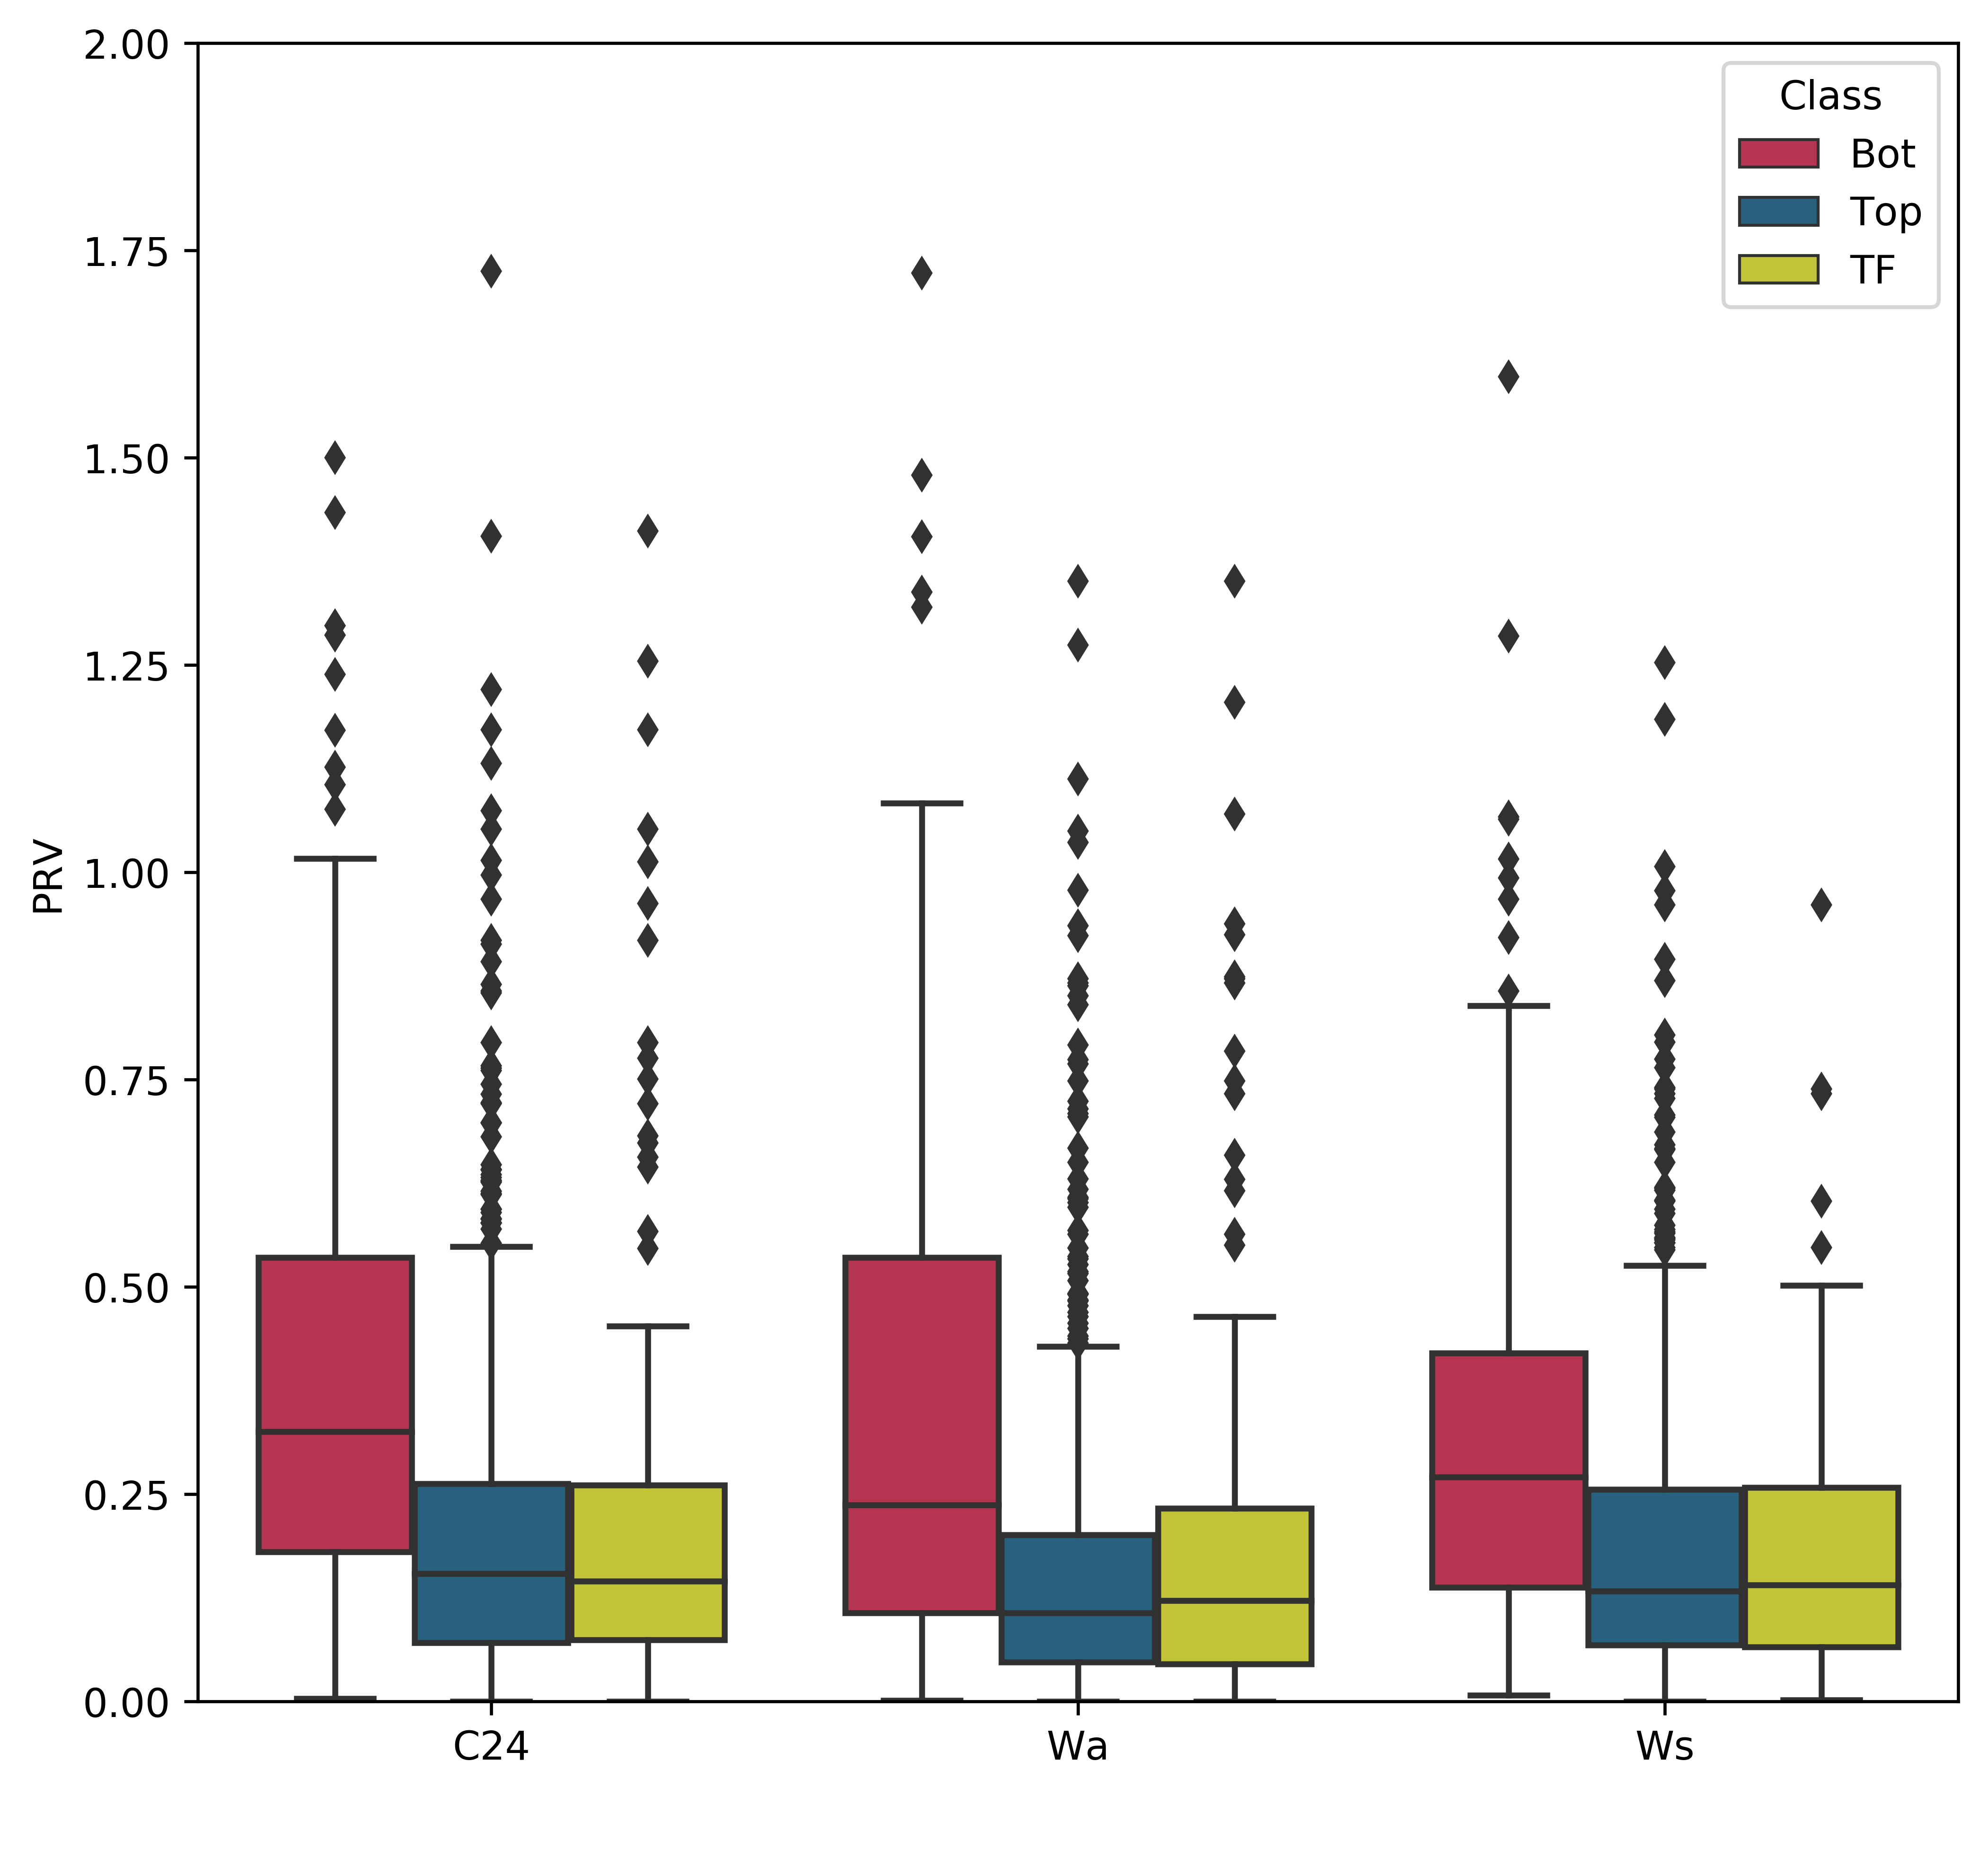

In [6]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8,8), dpi=DPI, sharex=True)

###############################
####       PRV Plots       ####
###############################

ax1 = sns.boxplot(x="Accession", y="PRV", 
                    hue="Class", data=drm,
                    palette=class_colors,
                    ax=ax1)

ax1.get_xaxis().set_tick_params(direction='out')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylim(0,2)
ax1.set_xlabel(' ')
# label_diff(ax1, 0, 1,'$p=x$',ind,menMeans, y_shift=-0.4, y_diff=.44)
# label_diff(ax1, 2, 3,'$p=y$',ind,menMeans, y_shift=-0.4, y_diff=.44)
# label_diff(ax1, 4, 5,'$p=z$',ind,menMeans, y_shift=-0.4, y_diff=.44)

# General plot tidying
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('../figures/tas_tf_box.png')

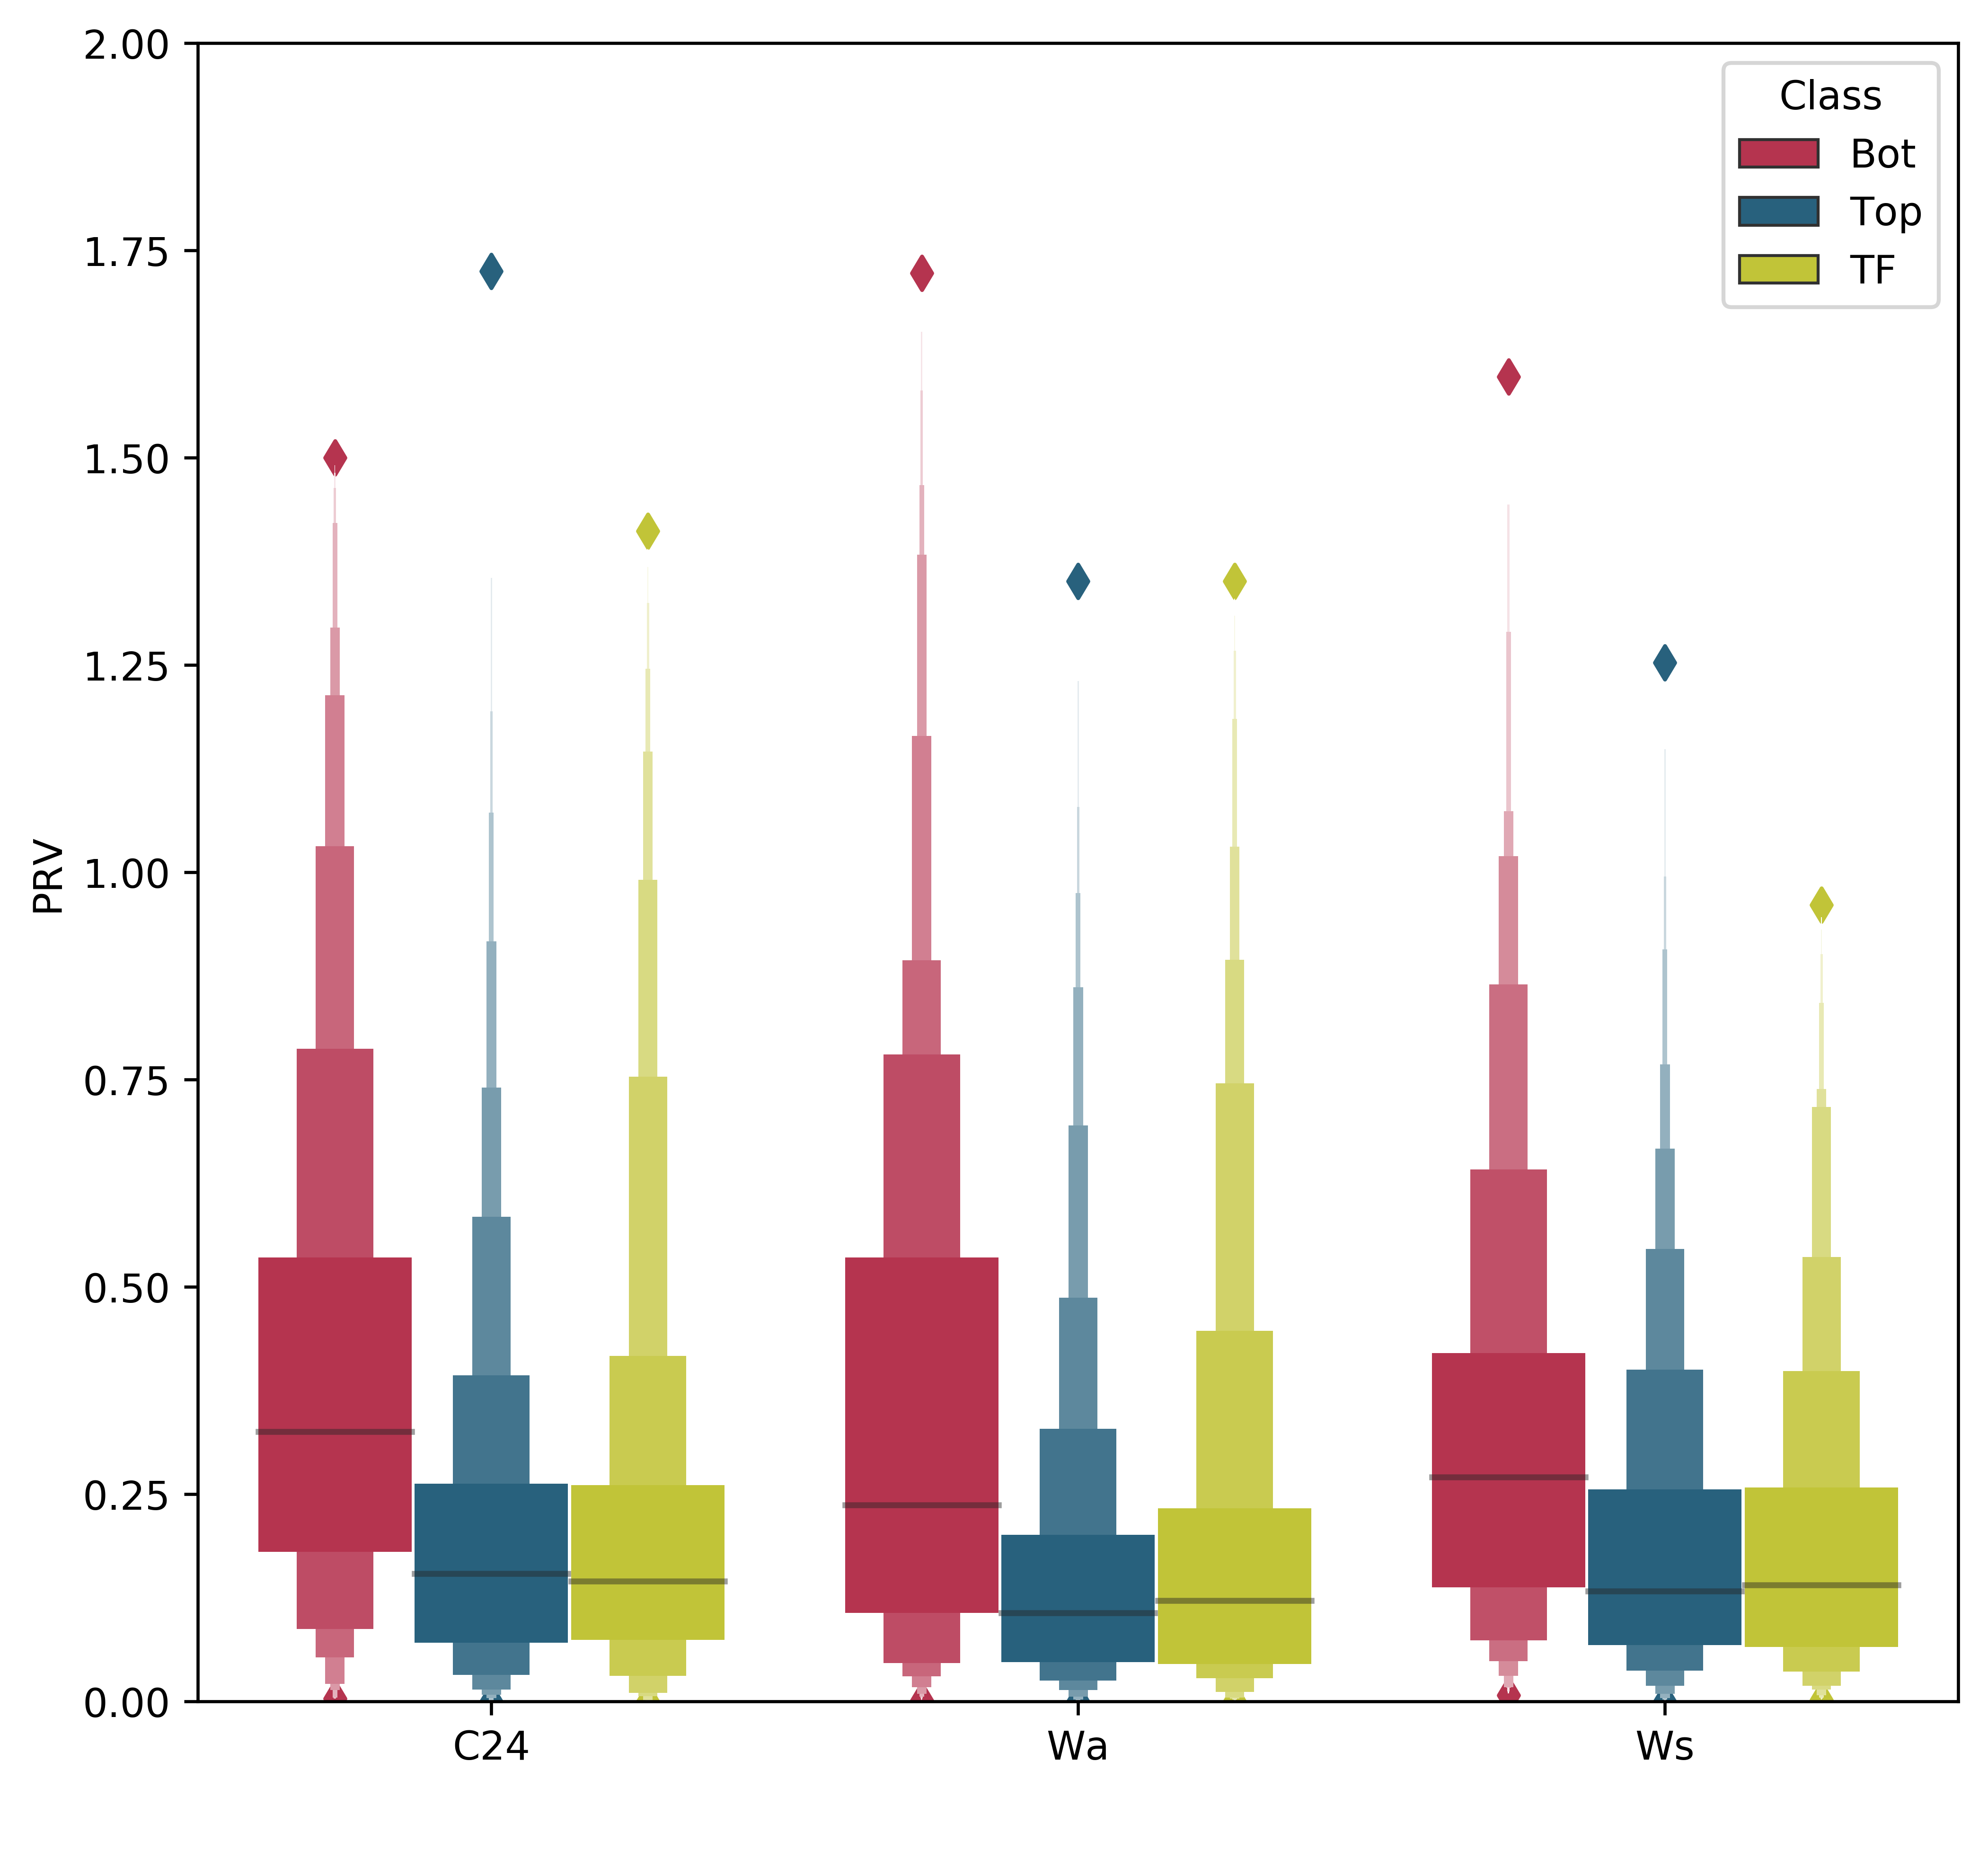

In [7]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(8,8), dpi=DPI, sharex=True)

###############################
####       PRV Plots       ####
###############################

ax1 = sns.boxenplot(x="Accession", y="PRV", 
                    hue="Class", data=drm,
                    palette=class_colors,
                    ax=ax1)

ax1.get_xaxis().set_tick_params(direction='out')
ax1.xaxis.set_ticks_position('bottom')
ax1.set_ylim(0,2)
ax1.set_xlabel(' ')
# label_diff(ax1, 0, 1,'$p=x$',ind,menMeans, y_shift=-0.4, y_diff=.44)
# label_diff(ax1, 2, 3,'$p=y$',ind,menMeans, y_shift=-0.4, y_diff=.44)
# label_diff(ax1, 4, 5,'$p=z$',ind,menMeans, y_shift=-0.4, y_diff=.44)

# General plot tidying
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.savefig('../figures/tas_tf_boxen.png')